In [16]:
import pandas as pd
from dataprep.eda import plot
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [17]:
path = '../data'

# Worldwide Vaccination Analysis - focussed on USA and Canada

In [20]:
# import data

world_data_path = path + '/raw_datasets/owid-covid-data.csv'

df = pd.read_csv(world_data_path, parse_dates=['date'])

In [19]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [7]:
# The dataset contains gloabl information. We will focus only on US and Canada.

countries = ['United States', 'Canada']
df_US_CA = df[df['location'].isin(countries)]
df_US_CA.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
26734,CAN,North America,Canada,2020-01-26,1.0,1.0,NaN,NaN,NaN,NaN,...,12.0,16.6,NaN,2.5,82.43,0.929,-873.4,-3.41,-2.47,-22.943207
26735,CAN,North America,Canada,2020-01-27,1.0,0.0,NaN,NaN,NaN,NaN,...,12.0,16.6,NaN,2.5,82.43,0.929,NaN,NaN,NaN,NaN
26736,CAN,North America,Canada,2020-01-28,2.0,1.0,NaN,NaN,NaN,NaN,...,12.0,16.6,NaN,2.5,82.43,0.929,NaN,NaN,NaN,NaN
26737,CAN,North America,Canada,2020-01-29,2.0,0.0,NaN,NaN,NaN,NaN,...,12.0,16.6,NaN,2.5,82.43,0.929,NaN,NaN,NaN,NaN
26738,CAN,North America,Canada,2020-01-30,2.0,0.0,NaN,NaN,NaN,NaN,...,12.0,16.6,NaN,2.5,82.43,0.929,NaN,NaN,NaN,NaN


In [21]:
# Select the columns related to vaccination

df_US_CA_vaccine = df_US_CA[['iso_code', 'continent', 'location', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred', 'population']]
df_US_CA_vaccine.head()

,iso_code,continent,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,population
26734,CAN,North America,Canada,2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38067913.0
26735,CAN,North America,Canada,2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38067913.0
26736,CAN,North America,Canada,2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38067913.0
26737,CAN,North America,Canada,2020-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38067913.0
26738,CAN,North America,Canada,2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38067913.0


In [22]:
df_US_CA_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1522 entries, 26734 to 155588
Data columns (total 18 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    1522 non-null   object        
 1   continent                                   1522 non-null   object        
 2   location                                    1522 non-null   object        
 3   date                                        1522 non-null   datetime64[ns]
 4   total_vaccinations                          872 non-null    float64       
 5   people_vaccinated                           872 non-null    float64       
 6   people_fully_vaccinated                     864 non-null    float64       
 7   total_boosters                              570 non-null    float64       
 8   new_vaccinations                            869 non-null    float64       
 9   ne

In [23]:
# The dates before vaccines were rolled out contain NAs currently.
# Replace those NAs with 0, signifying 0 people vaccinted on that particular date.

df_US_CA_vaccine = df_US_CA_vaccine.fillna(0)
df_US_CA_vaccine.head()

,iso_code,continent,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,population
26734,CAN,North America,Canada,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38067913.0
26735,CAN,North America,Canada,2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38067913.0
26736,CAN,North America,Canada,2020-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38067913.0
26737,CAN,North America,Canada,2020-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38067913.0
26738,CAN,North America,Canada,2020-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38067913.0


In [24]:
df_US_CA_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1522 entries, 26734 to 155588
Data columns (total 18 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    1522 non-null   object        
 1   continent                                   1522 non-null   object        
 2   location                                    1522 non-null   object        
 3   date                                        1522 non-null   datetime64[ns]
 4   total_vaccinations                          1522 non-null   float64       
 5   people_vaccinated                           1522 non-null   float64       
 6   people_fully_vaccinated                     1522 non-null   float64       
 7   total_boosters                              1522 non-null   float64       
 8   new_vaccinations                            1522 non-null   float64       
 9   ne

In [ ]:
plot(df_US_CA_vaccine)

27482


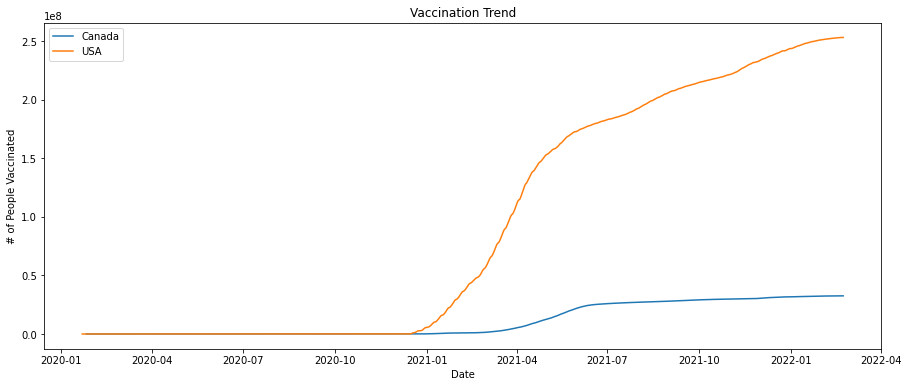

In [51]:
df_CA = df_US_CA_vaccine[df_US_CA_vaccine['location'].isin(['Canada'])]
df_US = df_US_CA_vaccine[df_US_CA_vaccine['location'].isin(['United States'])]

# Handling miss reported data
index = df_CA.index[df_CA['date'] == '2022-02-12'].tolist()
print(index[0])
df_CA.at[index[0], 'people_vaccinated'] = df_CA.at[index[0]-1, 'people_vaccinated']

figure(figsize=(15, 6))
plt.plot(df_CA['date'], df_CA['people_vaccinated'], label='Canada')
plt.plot(df_US['date'], df_US['people_vaccinated'], label='USA')
plt.xlabel('Date')
plt.ylabel('# of People Vaccinated')
plt.title('Vaccination Trend')
plt.legend()

From this plot, we see that vaccination began early in US (around December 2020) compared to CA, where it began around March 2021. In absolute vaccination count, US has more number of people vaccinated compared to Canada. However, US also has a higher population compared to CA. So we find the percentage of people vaccinated in both the countries, based on their respective population.

In [ ]:
# calculate proportion of people vaccinated out of the whole population

def calc_vacc_by_pop(row):
  return row['people_vaccinated']/row['population']

df_CA['people_vaccinated_by_population'] = df_CA.apply(lambda x: calc_vacc_by_pop(x), axis=1)
df_US['people_vaccinated_by_population'] = df_US.apply(lambda x: calc_vacc_by_pop(x), axis=1)

In [53]:
df_US.tail()

,iso_code,continent,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,population,people_vaccinated_by_population
155584,USA,North America,United States,2022-02-18,550592648.0,252963753.0,214121394.0,92947243.0,402635.0,324490.0,165.84,76.19,64.49,28.00,977.0,83684.0,0.025,332915074.0,0.759845
155585,USA,North America,United States,2022-02-19,550812524.0,253023970.0,214180842.0,93044285.0,219876.0,309107.0,165.90,76.21,64.51,28.02,931.0,79531.0,0.024,332915074.0,0.760026
155586,USA,North America,United States,2022-02-20,550891649.0,253046766.0,214201096.0,93079062.0,79125.0,299824.0,165.93,76.22,64.52,28.04,903.0,76886.0,0.023,332915074.0,0.760094
155587,USA,North America,United States,2022-02-21,550924900.0,253055679.0,214209156.0,93094542.0,33251.0,259219.0,165.94,76.22,64.52,28.04,781.0,66110.0,0.020,332915074.0,0.760121
155588,USA,North America,United States,2022-02-22,550924900.0,253055679.0,214209156.0,93094542.0,0.0,206801.0,165.94,76.22,64.52,28.04,623.0,52677.0,0.016,332915074.0,0.760121


In [54]:
df_CA.tail()

,iso_code,continent,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,population,people_vaccinated_by_population
27488,CAN,North America,Canada,2022-02-18,80316381.0,32512152.0,30743452.0,17060777.0,118830.0,92503.0,210.98,85.41,80.76,44.82,2430.0,7099.0,0.019,38067913.0,0.854057
27489,CAN,North America,Canada,2022-02-19,80376854.0,32518758.0,30756589.0,17101507.0,60473.0,90060.0,211.14,85.42,80.79,44.92,2366.0,7583.0,0.020,38067913.0,0.854230
27490,CAN,North America,Canada,2022-02-20,80429624.0,32522037.0,30768660.0,17138927.0,52770.0,86516.0,211.28,85.43,80.83,45.02,2273.0,7592.0,0.020,38067913.0,0.854316
27491,CAN,North America,Canada,2022-02-21,80441157.0,32522373.0,30770375.0,17148409.0,11533.0,78485.0,211.31,85.43,80.83,45.05,2062.0,7482.0,0.020,38067913.0,0.854325
27492,CAN,North America,Canada,2022-02-22,80594498.0,32540290.0,30803604.0,17250604.0,153341.0,78189.0,211.71,85.48,80.92,45.32,2054.0,7296.0,0.019,38067913.0,0.854796


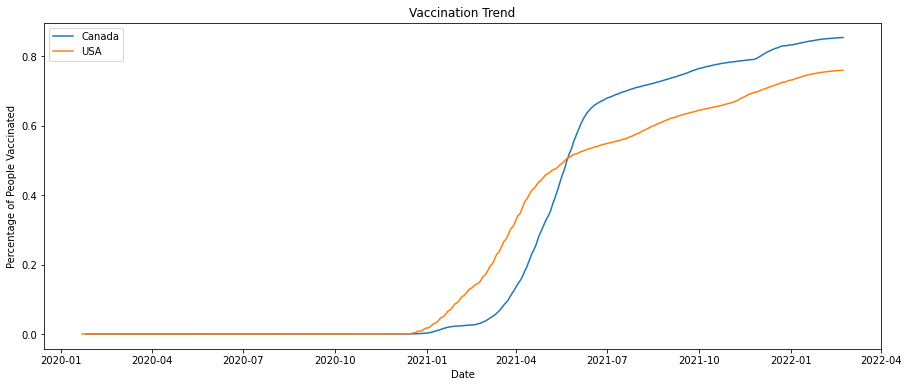

In [55]:
figure(figsize=(15, 6))
plt.plot(df_CA['date'], df_CA['people_vaccinated_by_population'], label='Canada')
plt.plot(df_US['date'], df_US['people_vaccinated_by_population'], label='USA')
plt.xlabel('Date')
plt.ylabel('Percentage of People Vaccinated')
plt.title('Vaccination Trend')
plt.legend()

Even though US has more overall vaccination numbers, they also have a higher population compared to Canada. This second plot shows us that initially percentage of people vaccinated was higher in US, but soon, CA surpassed US and now has a higher percentage of vaccinated population.

# New York State Vaccination Analysis

In [57]:
NY_data_path = path + '/raw_datasets/New_York_State_Statewide_COVID-19_Vaccination_Data_by_County.csv'

df_NY = pd.read_csv(NY_data_path, parse_dates=['Report as of'])

In [58]:
df_NY.head()

,Region,County,First Dose,Series Complete,Report as of
0,Capital Region,Albany,74,0,2020-12-14
1,Western New York,Allegany,0,0,2020-12-14
2,New York City,Bronx,2,0,2020-12-14
3,Southern Tier,Broome,0,0,2020-12-14
4,Western New York,Cattaraugus,0,0,2020-12-14


In [59]:
df_NY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27714 entries, 0 to 27713
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Region           27714 non-null  object        
 1   County           27714 non-null  object        
 2   First Dose       27714 non-null  int64         
 3   Series Complete  27714 non-null  int64         
 4   Report as of     27714 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.1+ MB


Text(0.5, 1.0, 'Vaccination Trend for Partially Vaccinated in New York State')

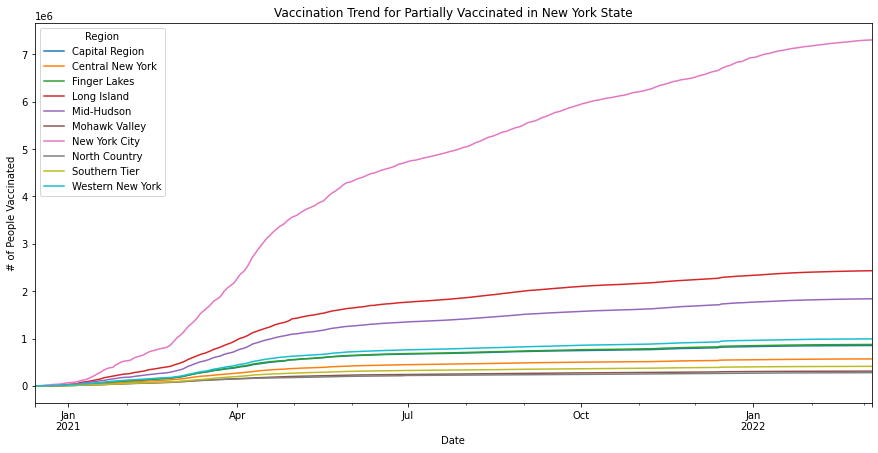

In [60]:
# first dose of vaccination trend for different regions of New York State

fig, ax = plt.subplots(figsize=(15,7))
df_NY.groupby(['Report as of', 'Region']).sum()['First Dose'].unstack().plot(legend=True, ax=ax)
plt.xlabel('Date')
plt.ylabel('# of People Vaccinated')
plt.title('Vaccination Trend for Partially Vaccinated in New York State')

Text(0.5, 1.0, 'Vaccination Trend for Fully Vaccinated in New York State')

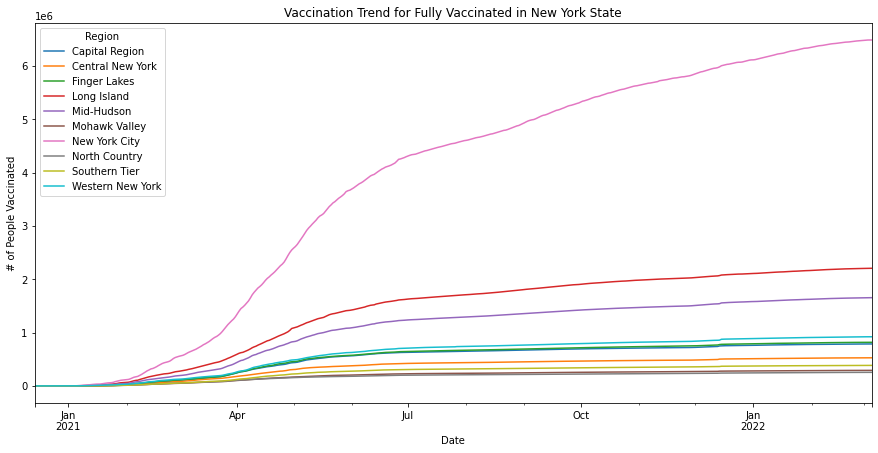

In [61]:
# second dose of vaccination trend for different regions of New York State

fig, ax = plt.subplots(figsize=(15,7))
df_NY.groupby(['Report as of', 'Region']).sum()['Series Complete'].unstack().plot(legend=True, ax=ax)
plt.xlabel('Date')
plt.ylabel('# of People Vaccinated')
plt.title('Vaccination Trend for Fully Vaccinated in New York State')

In [66]:
# load the file to get the geometry information and population of New York counties.

population_path = path + '/raw_datasets/NYS_Civil_Boundaries.shp.zip'
street_map = gpd.read_file(population_path,)
print(street_map.head())

      NAME MUNI_TYPE  MUNITYCODE     COUNTY GNIS_ID   FIPS_CODE    SWIS  \
0    Adams      town           2  Jefferson  978655  3604500210  222000   
1  Addison      town           2    Steuben  978656  3610100287  462000   
2    Afton      town           2   Chenango  978657  3601700353  082000   
3  Alabama      town           2    Genesee  978658  3603700474  182000   
4   Albany      city           1     Albany  978659  3600101000  010100   

   POP1990  POP2000  POP2010  POP2020 DOS_LL DOSLL_DATE MAP_SYMBOL  \
0     4977     4782     5143     4973   None       None          T   
1     2645     2640     2595     2397   None       None          T   
2     2972     2977     2851     2769   None       None          T   
3     1998     1881     1869     1602   None       None          T   
4   101082    95658    97856    99224   None       None          1   

   CALC_SQ_MI     DATEMOD    Shape_Leng    Shape_Area  \
0   42.361757  2018-11-06  41971.838963  1.097164e+08   
1   25.777686 

In [69]:
# select the required columns

NY_population = street_map[['NAME', 'COUNTY', 'POP2020']]
NY_population_grouped = NY_population.groupby('COUNTY')['POP2020'].sum().reset_index()

# data preprocessing

df_NY.loc[df_NY['County'].isin(['New York', 'Bronx', 'Kings', 'Queens', 'Richmond']), 'County'] = 'New York, Bronx, Kings, Richmond, Queens'
df_NY.loc[df_NY['County'].isin(['St. Lawrence']), 'County'] = 'St Lawrence'

NY_vaccine_by_population = pd.merge(df_NY, NY_population_grouped, left_on='County', right_on='COUNTY', how='left')
NY_vaccine_by_population.head()

,Region,County,First Dose,Series Complete,Report as of,COUNTY,POP2020
0,Capital Region,Albany,74,0,2020-12-14,Albany,314848
1,Western New York,Allegany,0,0,2020-12-14,Allegany,46449
2,New York City,"New York, Bronx, Kings, Richmond, Queens",2,0,2020-12-14,"New York, Bronx, Kings, Richmond, Queens",8804190
3,Southern Tier,Broome,0,0,2020-12-14,Broome,198683
4,Western New York,Cattaraugus,0,0,2020-12-14,Cattaraugus,75467


Since New York City has the highest population, we always see it at the top of vaccination charts. To get a better sense out of this data, we will normalise the vaccinated count by population of individual regions/counties.

In [70]:
# calculate per population values for first and second dose of vaccines

NY_vaccine_by_population['first_dose_by_pop'] = NY_vaccine_by_population.apply(lambda x: x['First Dose']/x['POP2020'], axis=1)
NY_vaccine_by_population['series_complete_by_pop'] = NY_vaccine_by_population.apply(lambda x: x['Series Complete']/x['POP2020'], axis=1)
NY_vaccine_by_population.tail()

,Region,County,First Dose,Series Complete,Report as of,COUNTY,POP2020,first_dose_by_pop,series_complete_by_pop
27709,Capital Region,Washington,41198,38975,2022-03-05,Washington,61302,0.672050,0.635787
27710,Finger Lakes,Wayne,64228,60474,2022-03-05,Wayne,91283,0.703614,0.662489
27711,Mid-Hudson,Westchester,854919,765885,2022-03-05,Westchester,1004457,0.851126,0.762487
27712,Finger Lakes,Wyoming,23036,21648,2022-03-05,Wyoming,40531,0.568355,0.534110
27713,Finger Lakes,Yates,14447,13422,2022-03-05,Yates,24774,0.583152,0.541778


Text(0.5, 1.0, 'Vaccination Trend for Partially Vaccinated Per Population in New York State')

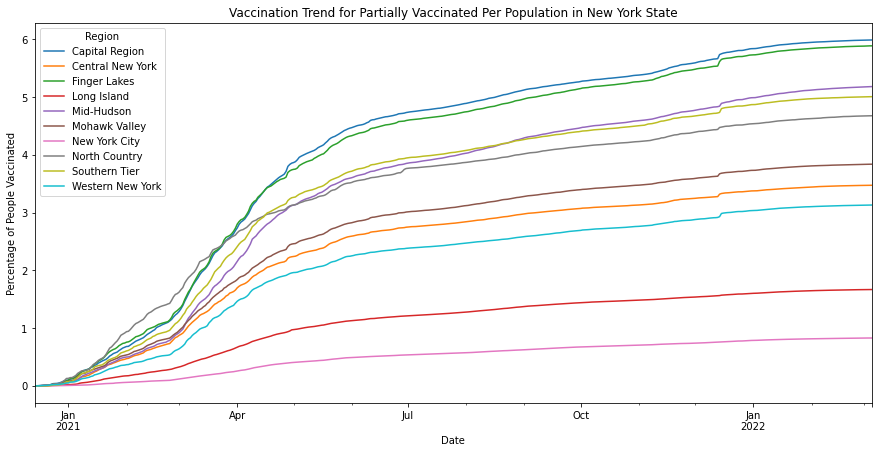

In [71]:
# plot percentage of vaccinated population for different regions of New York State

fig, ax = plt.subplots(figsize=(15,7))
NY_vaccine_by_population.groupby(['Report as of', 'Region']).sum()['first_dose_by_pop'].unstack().plot(legend=True, ax=ax)
plt.xlabel('Date')
plt.ylabel('Percentage of People Vaccinated')
plt.title('Vaccination Trend for Partially Vaccinated Per Population in New York State')

Text(0.5, 1.0, 'Vaccination Trend for Fully Vaccinated Per Population in New York State')

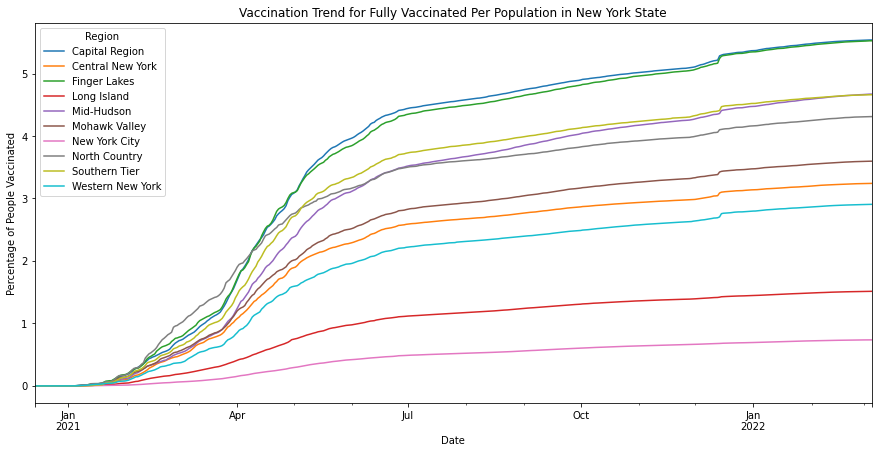

In [72]:
fig, ax = plt.subplots(figsize=(15,7))
NY_vaccine_by_population.groupby(['Report as of', 'Region']).sum()['series_complete_by_pop'].unstack().plot(legend=True, ax=ax)
plt.xlabel('Date')
plt.ylabel('Percentage of People Vaccinated')
plt.title('Vaccination Trend for Fully Vaccinated Per Population in New York State')

In [73]:
# plotting vaccination trends for top 5 New York counties

NY_grouped_first = NY_vaccine_by_population.groupby(['County']).sum()['first_dose_by_pop']
top5 = NY_grouped_first.sort_values(ascending=False)[:5].index.to_list()
NY_county_first = NY_vaccine_by_population.groupby(['Report as of', 'County']).sum()['first_dose_by_pop'].unstack()

Text(0.5, 1.0, 'Top 5 New York Counties with Highest Percentage of Partially Vaccinated Population')

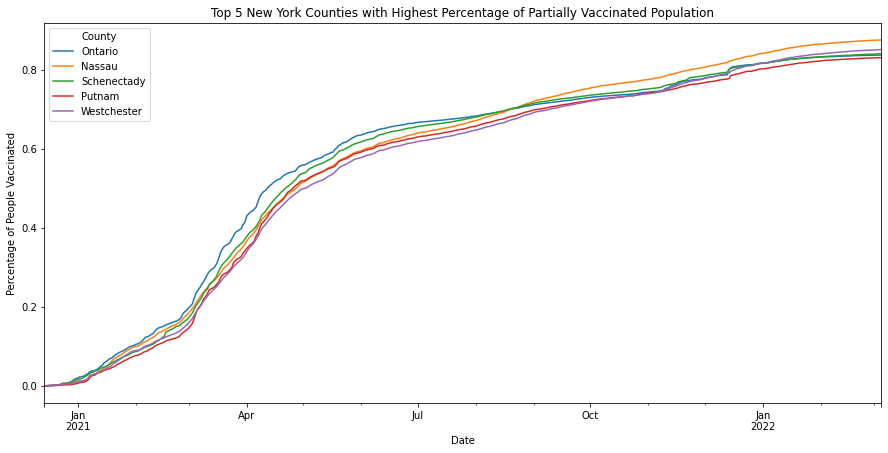

In [74]:
fig, ax = plt.subplots(figsize=(15,7))
NY_county_first[top5].plot(ax=ax)
plt.xlabel('Date')
plt.ylabel('Percentage of People Vaccinated')
plt.title('Top 5 New York Counties with Highest Percentage of Partially Vaccinated Population')

In [75]:
NY_grouped = NY_vaccine_by_population.groupby(['County']).sum()['series_complete_by_pop']
top5 = NY_grouped.sort_values(ascending=False)[:5].index.to_list()
print(top5)
NY_county = NY_vaccine_by_population.groupby(['Report as of', 'County']).sum()['series_complete_by_pop'].unstack()

['Ontario', 'Nassau', 'Schenectady', 'Warren', 'Madison']


Text(0.5, 1.0, 'Top 5 New York Counties with Highest Percentage of Fully Vaccinated Population')

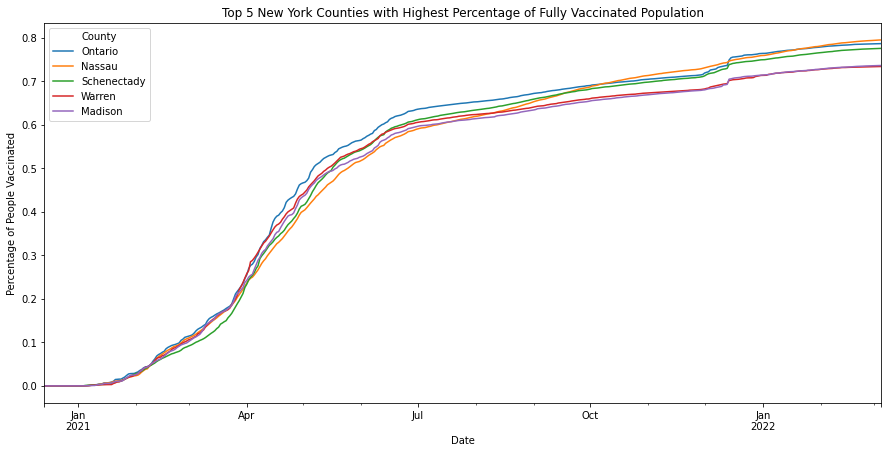

In [76]:
fig, ax = plt.subplots(figsize=(15,7))
NY_county[top5].plot(ax=ax)
plt.xlabel('Date')
plt.ylabel('Percentage of People Vaccinated')
plt.title('Top 5 New York Counties with Highest Percentage of Fully Vaccinated Population')

In [77]:
NY_vaccine_by_population.head()

,Region,County,First Dose,Series Complete,Report as of,COUNTY,POP2020,first_dose_by_pop,series_complete_by_pop
0,Capital Region,Albany,74,0,2020-12-14,Albany,314848,2.350340e-04,0.0
1,Western New York,Allegany,0,0,2020-12-14,Allegany,46449,0.000000e+00,0.0
2,New York City,"New York, Bronx, Kings, Richmond, Queens",2,0,2020-12-14,"New York, Bronx, Kings, Richmond, Queens",8804190,2.271646e-07,0.0
3,Southern Tier,Broome,0,0,2020-12-14,Broome,198683,0.000000e+00,0.0
4,Western New York,Cattaraugus,0,0,2020-12-14,Cattaraugus,75467,0.000000e+00,0.0


In [78]:
# preprocess data

NY_vaccine_by_population = NY_vaccine_by_population.rename(columns={'First Dose':'Partially Vaccinated', 'Series Complete':'Fully Vaccinated'})
NY_vaccine_by_population['Non Vaccinated'] = NY_vaccine_by_population['POP2020'] - NY_vaccine_by_population['Partially Vaccinated']
NY_vaccine_by_population = NY_vaccine_by_population.drop(['COUNTY', 'first_dose_by_pop', 'series_complete_by_pop'], axis=1)
NY_vaccine_by_population['Partially Vaccinated per Population'] = NY_vaccine_by_population['Partially Vaccinated']/NY_vaccine_by_population['POP2020']
NY_vaccine_by_population['Fully Vaccinated per Population'] = NY_vaccine_by_population['Fully Vaccinated']/NY_vaccine_by_population['POP2020']
NY_vaccine_by_population['Non Vaccinated per Population'] = NY_vaccine_by_population['Non Vaccinated']/NY_vaccine_by_population['POP2020']

In [79]:
NY_vaccine_by_population.tail()

,Region,County,Partially Vaccinated,Fully Vaccinated,Report as of,POP2020,Non Vaccinated,Partially Vaccinated per Population,Fully Vaccinated per Population,Non Vaccinated per Population
27709,Capital Region,Washington,41198,38975,2022-03-05,61302,20104,0.672050,0.635787,0.327950
27710,Finger Lakes,Wayne,64228,60474,2022-03-05,91283,27055,0.703614,0.662489,0.296386
27711,Mid-Hudson,Westchester,854919,765885,2022-03-05,1004457,149538,0.851126,0.762487,0.148874
27712,Finger Lakes,Wyoming,23036,21648,2022-03-05,40531,17495,0.568355,0.534110,0.431645
27713,Finger Lakes,Yates,14447,13422,2022-03-05,24774,10327,0.583152,0.541778,0.416848


In [53]:
# save clean and preprocessed vaccine dataset

NY_vaccine_by_population.to_parquet('/processed_datasets/vaccination.parquet.gzip')